In [14]:
import pandas as pd
import numpy as np

from bibtexparser.customization import homogenize_latex_encoding
from bibtexparser.bparser import BibTexParser

import matplotlib.pyplot as plt

%matplotlib inline

import plotly.express as px

In [15]:
from pybibx.base import pbx_probe

# Artigos coletados

Foi encontrado um total de 525 documentos da base de dados fornecidos pelo `Scopus`. A pesquisa de palavras chaves utilizadas foram:

    "BERT" AND "llm"

TITLE-ABS-KEY ( bert AND ( "survival analysis" OR "natural language processing" OR "churn prediction" OR "sentiment analysis" ) ) -> 10 297

TITLE-ABS-KEY ( bert AND ( "survival analysis" OR "churn prediction" OR "sentiment analysis" ) ) -> 3097

TITLE-ABS-KEY ( "bert" AND ( "sentiment analysis" OR "survival analysis" ) ) -> 3068


In [16]:
file_name = './data/scopus2.bib'
database = 'scopus'

bibfile = pbx_probe(file_bib= file_name, db= database, del_duplicated= True)

A Total of 3050 Documents were Found ( 3073 Documents and 23 Duplicates )

Article = 1231
Book = 3
Book chapter = 39
Conference paper = 1652
Conference review = 95
Erratum = 1
Retracted = 3
Review = 26


### Relatório a respeito da consistência dos dados do arquivo



In [17]:
health = bibfile.health_bib()
health

Entries Completeness (%) Number of  Docs
0             Sources          100.00%            3050
1           Abstracts          100.00%            3050
2         Affiliation          100.00%            3050
3           Author(s)           96.95%            2957
4                 DOI           87.61%            2672
5  Keywords - Authors           89.05%            2716
6     Keywords - Plus           79.51%            2425
7          References            0.00%               0
8                Year          100.00%            3050

### Relatório de análise exploratória de dados

Importante perceber inicialmente a discrepância da produção dos EUA a respeito do assunto, (pelo menos na base de dados do Scopus).
Além disso, temos a faixa de tempo extremamente recente do assunto, com o artigo mais antigo sendo do ano de 2022.
A maioria dos documentos coletados são trabalhos de conferência, somente 174 sendo artigos científicos

In [18]:
report = bibfile.eda_bib()
report

Main Information    Results
0                                Timespan  2019-2025
1               Total Number of Countries        109
2            Total Number of Institutions       3914
3                 Total Number of Sources       1245
4              Total Number of References          0
5               Total Number of Languages          6
6                   --chinese (# of docs)         55
7                   --english (# of docs)       2978
8                    --korean (# of docs)          2
9                   --russian (# of docs)          1
10                  --spanish (# of docs)          1
11                  --turkish (# of docs)         13
12                                   -//-       -//-
13              Total Number of Documents       3050
14                              --Article       1231
15                                 --Book          3
16                         --Book chapter         39
17                     --Conference paper       1652
18                    --Conference review         95
19                              --Erratum          1
20                            --Retracted          3
21                               --Review         26
22           Average Documents per Author       1.17
23      Average Documents per Institution       2.56
24           Average Documents per Source       2.45
25             Average Documents per Year     435.71
26                                   -//-       -//-
27                Total Number of Authors       9225
28       Total Number of Authors Keywords       4885
29  Total Number of Authors Keywords Plus       7897
30        Total Single-Authored Documents        230
31         Total Multi-Authored Documents       2820
32            Average Collaboration Index       3.53
33                            Max H-Index          5
34                                   -//-       -//-
35              Total Number of Citations      31540
36           Average Citations per Author       3.42
37      Average Citations per Institution       8.06
38         Average Citations per Document      10.34
39           Average Citations per Source      25.33
40                                   -//-       -//-

In [19]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

In [20]:
bibfile.data.head(n = 10)

bib_df = bibfile.data
bib_df.head(5)

abbrev_source_title  \
0             Technol. Soc.   
1          Knowl Based Syst   
2                Tour. Rev.   
3  Peer-to-Peer Netw. Appl.   
4         J. Online Inform.   

                                                                                              abstract  \
0  With the rapid development of e-commerce and digital consumption, online reviews have become an ...   
1  Sentiment analysis extracts the sentiment of content creators, enabling users to easily gain val...   
2  Purpose: This study aims to examine how dynamic pricing impacts customer perceptions of restaura...   
3  Trustworthy manufacturer selection is essential for ensuring production quality control. Existin...   
4  The tourism sector is a potential resource for advancing the Indonesian economy. The development...   

   address  \
0  UNKNOWN   
1  UNKNOWN   
2  UNKNOWN   
3  UNKNOWN   
4  UNKNOWN   

                                                                                           affiliation  \
0  Wang, Zheng School of Management, Shanghai University, Shanghai, 200444, China; Liu, Huiran Busi...   
1            Wallaart, Olaf Erasmus University Rotterdam, PO Box 1738, Rotterdam, 3000 DR, Netherlands   
2  Gómez-Talal, Ismael Department of Signal Theory and Communications and Telematic Systems and Com...   
3  Jahani, Meysam Faculty of Computer Engineering, University of Isfahan, Isfahan, Iran; Zojaji, Za...   
4  Vashellya, Zhasa Computational Statistics Study Program, STIS Polytechnic of Statistics, Indones...   

                                                                                          affiliations  \
0  School of Management, Shanghai University, Shanghai, 200444, China; Business School, University ...   
1                           Erasmus University Rotterdam, PO Box 1738, Rotterdam, 3000 DR, Netherlands   
2  Department of Signal Theory and Communications and Telematic Systems and Computation, Rey Juan C...   
3  Faculty of Computer Engineering, University of Isfahan, Isfahan, Iran; School of Computer Scienc...   
4  Computational Statistics Study Program, STIS Polytechnic of Statistics, Indonesia; Directorate o...   

  art_number  \
0    UNKNOWN   
1    UNKNOWN   
2    UNKNOWN   
3    UNKNOWN   
4    UNKNOWN   

                                                                                            author  \
0                                                     Wang, Zheng and Liu, Huiran and Fan, Xiaojun   
1                                    Wallaart, Olaf and Frasincar, Flavius and van der Knaap, Finn   
2  Gómez-Talal, Ismael and Talón-Ballestero, Pilar and Leoni, Veronica and González-Serrano, Lydia   
3                                               Jahani, Meysam and Zojaji, Zahra and Raji, Fatemeh   
4                                        Vashellya, Zhasa and Nurmawati, Erna and Sugiyarto, Teguh   

                                                                                       author_keywords  \
0  Consumer preference; Decision-making support; Information helpfulness; Machine learning; Multi-c...   
1  Aspect-based sentiment analysis; Focal loss; Neural network; Sentence-BERT; Weakly-supervised le...   
2  BERT model; Customer perception; Difference-in-difference; Hospitality industry; Revenue managem...   
3          Blockchain technology; Sentiment analysis; Transparency; Trustworthy manufacturer selection   
4                          International tourists; LSTM; Online Review; Prediction; Sentiment Analysis   

  chemicals_cas    coden  \
0       UNKNOWN  UNKNOWN   
1       UNKNOWN    KNSYE   
2       UNKNOWN  UNKNOWN   
3       UNKNOWN  UNKNOWN   
4       UNKNOWN  UNKNOWN   

                                                                                correspondence_address  \
0  X. Fan; School of Management, Shanghai University, Shanghai, 200444, China; email: ardourfan@shu...   
1  F. Frasincar; Erasmus University Rotterdam, Rotterdam, PO Box 1738, 3000 DR, Netherlands; emai

In [21]:
def extrair_pais(afiliacao):

    if afiliacao == 'UNKNOWN' or pd.isna(afiliacao):
        return None
    partes = str(afiliacao).strip('{}').split(',')
    return partes[-1].strip()

bib_df['country'] = bib_df['affiliations'].apply(extrair_pais)


Plot sobre a distribuição geográfica das produções

Podemos notar uma presença relevante da Índia e Alemanha no assunto

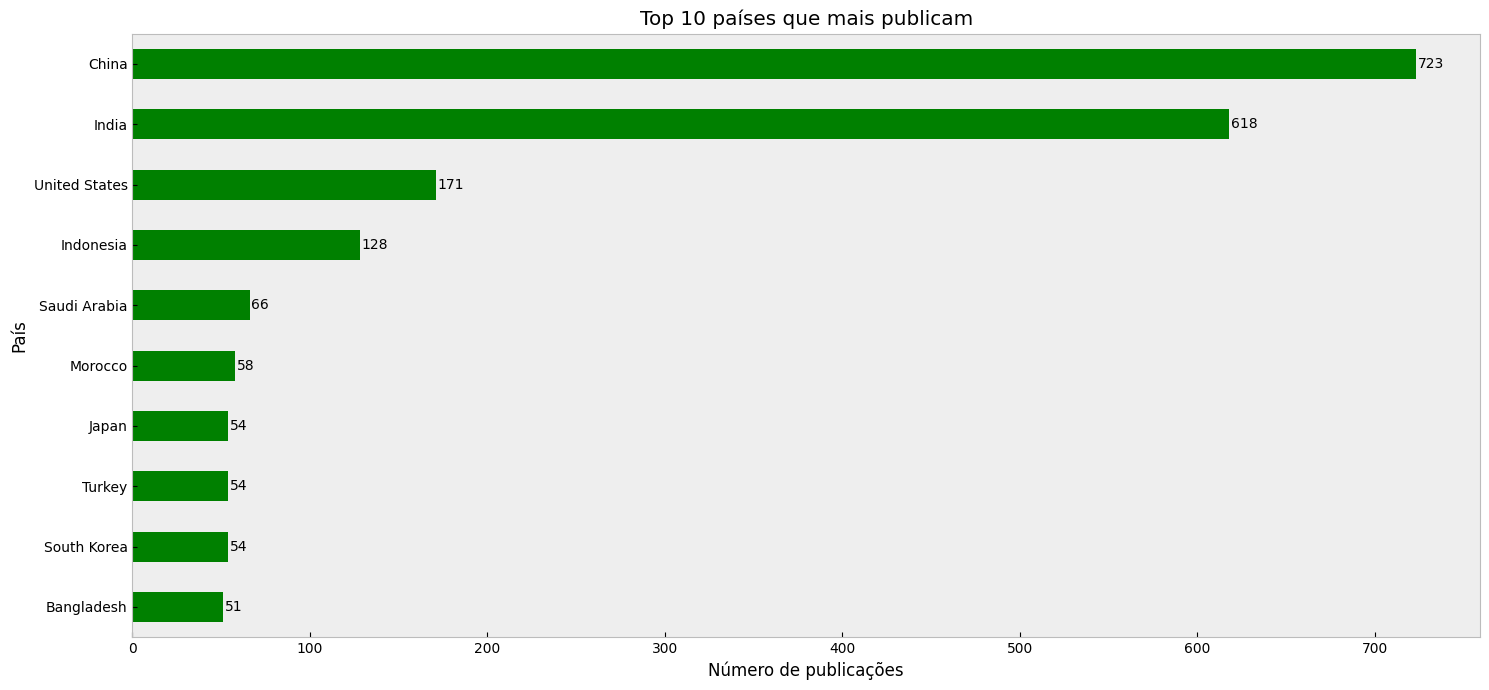

In [32]:
country_count = bib_df['country'].value_counts().head(10).sort_values(ascending=True)

country_count.plot(kind='barh', color='green', figsize=(15, 7))
plt.title("Top 10 países que mais publicam")
plt.ylabel("País")
plt.xlabel("Número de publicações")

for index, values in enumerate(country_count):
    plt.text(values + 1, index, str(values), va='center')

plt.grid(False)
plt.tight_layout()
plt.show()

### Análise de termos dos artigos

#### Nuvem de palavras

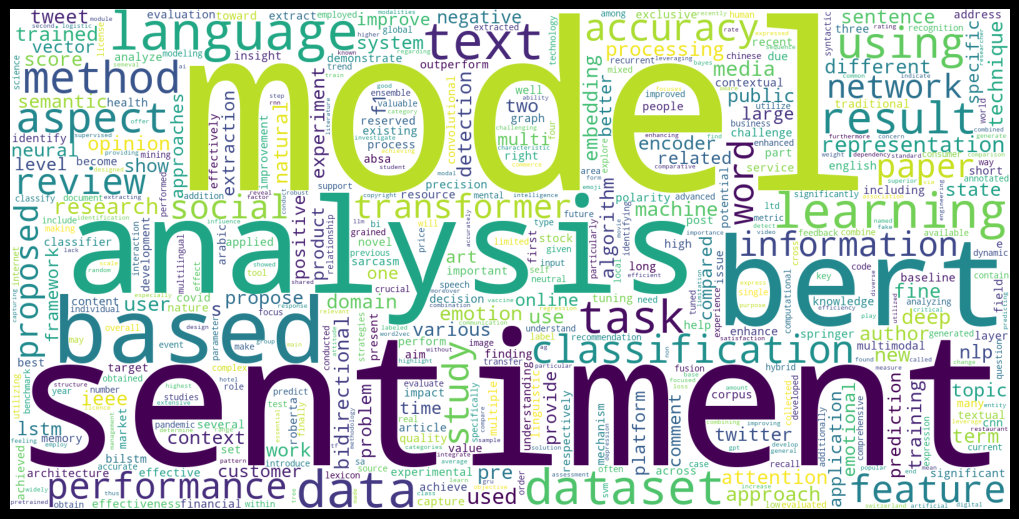

In [33]:
bibfile.word_cloud_plot(entry = 'abs', size_x = 10, size_y = 8, wordsn = 500, rmv_custom_words = [])

Relatório das frequência de termos

In [34]:
bibfile.get_top_ngrams(view= "notebook", entry= "abs", ngrams= 1, stop_words=['en'], rmv_custom_words=['model', 'models'], wordsn= 15)

In [35]:
from prettytable import PrettyTable

Análise da importância nos documentos

In [36]:
num_columns = 5
data_wd     = bibfile.ask_gpt_wd
items       = list(data_wd.items())

field_names = []
for i in range(num_columns):
    field_names.append(f"Word {i + 1}")
    field_names.append(f"Importance {i + 1}")

table = PrettyTable()
table.field_names = field_names

for i in range(0, len(items), num_columns):
    row = []
    for j in range(num_columns):
        if i + j < len(items):
            word, importance = items[i + j]
            row.extend([word, round(importance, 4)])
        else:
            row.extend(["", ""])
    table.add_row(row)

# Print the table
print(table)

+----------------+--------------+---------------+--------------+---------------+--------------+----------------+--------------+----------------+--------------+
|     Word 1     | Importance 1 |     Word 2    | Importance 2 |     Word 3    | Importance 3 |     Word 4     | Importance 4 |     Word 5     | Importance 5 |
+----------------+--------------+---------------+--------------+---------------+--------------+----------------+--------------+----------------+--------------+
|     model      |     1.0      |   sentiment   |    0.9095    |    analysis   |    0.6087    |      bert      |    0.5139    |     based      |    0.3648    |
|    language    |    0.3327    |      text     |    0.3177    |      data     |    0.3126    |    learning    |    0.2901    |    dataset     |    0.2805    |
|      task      |    0.2447    |     method    |    0.2341    |     result    |    0.2338    |     using      |    0.2284    |     aspect     |    0.2246    |
| classification |    0.2203    |    fea

Contagem de participações de países nos artigos

In [ ]:
countries_tree_map = bibfile.tree_map(view = 'notebook', entry = 'ctr', topn = 20)

countries_tree_map

Contagem dos periódicos

In [ ]:
periodicos_tree_map = bibfile.tree_map(view = 'notebook', entry = 'jou', topn = 20)

periodicos_tree_map

Contagem de palavras chaves

In [ ]:
keywords_tree_map = bibfile.tree_map(view = 'notebook', entry = 'kwp', topn = 20)

keywords_tree_map

In [ ]:
with open("./data/scopus2.bib", encoding="utf-8") as bibtex_file:
    parser = BibTexParser(common_strings=True)
    parser.customization = homogenize_latex_encoding
    bib_database = parser.parse_file(bibtex_file)
df = pd.DataFrame(bib_database.entries)

In [ ]:
# Adicionando coluna pais
df['country'] = df['affiliations'].apply(extrair_pais)

# Filtrando a contagem de citações
df['note'] = df['note'].str.extract(r'Cited by: (\d+)').astype(int)
df.rename(columns={'note':'cited_by_count'}, inplace= True)

### Análise dos top15 artigos mais citados

Surpreendentemente o top1 e top2 artigos não foram produções americanas, temos um artigo da Alamenha como top1 (137) citações e em 2º lugar um artigo de Singapura com 62 citações

In [ ]:
top15 = df.dropna(subset=['cited_by_count']).sort_values(by='cited_by_count', ascending=False).head(15)

In [ ]:
pd.set_option('max_colwidth', 500)
top15_view = top15[['cited_by_count', 'title', 'author', 'year', 'country', 'affiliations']]
top15_view['title'] = top15_view['title'].apply(lambda x: x.replace("{", "").replace("}", "") if isinstance(x, str) else x)
top15_view

cited_by_count  \
598             474   
577             403   
585             361   
588             195   
612             161   
438             137   
568             131   
497             115   
600             113   
500             106   
521              97   
415              84   
248              80   
608              76   
594              76   

                                                                                                                             title  \
598                                        BERT post-training for review reading comprehension and aspect-based sentiment analysis   
577                                         Transformer models for text-based emotion detection: a review of BERT-based approaches   
585                                                                            Target-dependent sentiment classification with BERT   
588                                                               Exploiting bert for end-to-end aspect-based sentiment analysis\_   
612                                                          Adversarial and domain-aware BERT for cross-domain sentiment analysis   
438                                               Transfer Learning for Sentiment Analysis Using BERT Based Supervised Fine-Tuning   
568                                 Exploiting BERT for Multimodal Target Sentiment Classification through Input Space Translation   
497                                       An effective bert-based pipeline for twitter sentiment analysis: A case study in Italian   
600  Adapt or get left behind: Domain adaptation through BERT language model finetuning for aspect-target sentiment classification   
500                                                           ParsBERT: Transformer-based Model for Persian Language Understanding   
521                                                   COVID-19 sentiment analysis via deep learning during the rise of novel cases   
415                                                Lexicon-Based vs. Bert-Based Sentiment Analysis: A Comparative Study in Italian   
248                                                           AOBERT: All-modalities-in-One BERT for multimodal sentiment analysis   
608                                                                                      RoBERT \textendash  A Romanian BERT Model   
594                                                SENTIX: A Sentiment-Aware Pre-Trained Model for Cross-Domain Sentiment Analysis   

                                                                                                                                                  author  \
598                                                                                                  Xu, Hu and Liu, Bing and Shu, Lei and Yu, Philip S.   
577                                                                                  Acheampong, Francisca Adoma and Nunoo-Mensah, Henry and Chen, Wenyu   
585                                                                                                Gao, Zhengjie and Feng, Ao and Song, Xinyu and Wu, Xi   
588                                                                                             Li, Xin and Bing, Lidong and Zhang, Wenxuan and Lam, Wai   
612                                                                          Du, Chunning and Sun, Haifeng and Wang, Jingyu and Qi, Qi and Liao, Jianxin   
438  Prottasha, Nusrat Jahan and Sami, Abdullah As and Kowsher, Md and Murad, Saydul Akbar and Bairagi, Anupam Kumar and Masud, Mehedi and Baz, Mohammed   
568                                                                                                                               Khan, Zaid and Fu, Yun   
497                                                                            Pota, Marco and Ventura, Mirko and Catelli, Rosario and Esposito, Massimo   
600                                                                        Rietzler, Al

In [ ]:
fig = px.pie(
    top15_view,
    values='cited_by_count',
    names='title',
    title='Top 15 artigos mais citados',
)

fig.update_layout(
    legend=dict(
        orientation='v',       
        xanchor='left',        
        yanchor='auto',        
        font=dict(
            size=14            
        ),
    ),
    width= 1700,
    height= 600
)


fig.update_traces(textinfo='value+percent', hovertext= top15_view['title'], hovertemplate='<b>%{hovertext}</b><br>%{customdata}', customdata=top15_view['country'], pull=[0.05]*len(top15))
fig.show()


### Análise de citações por países

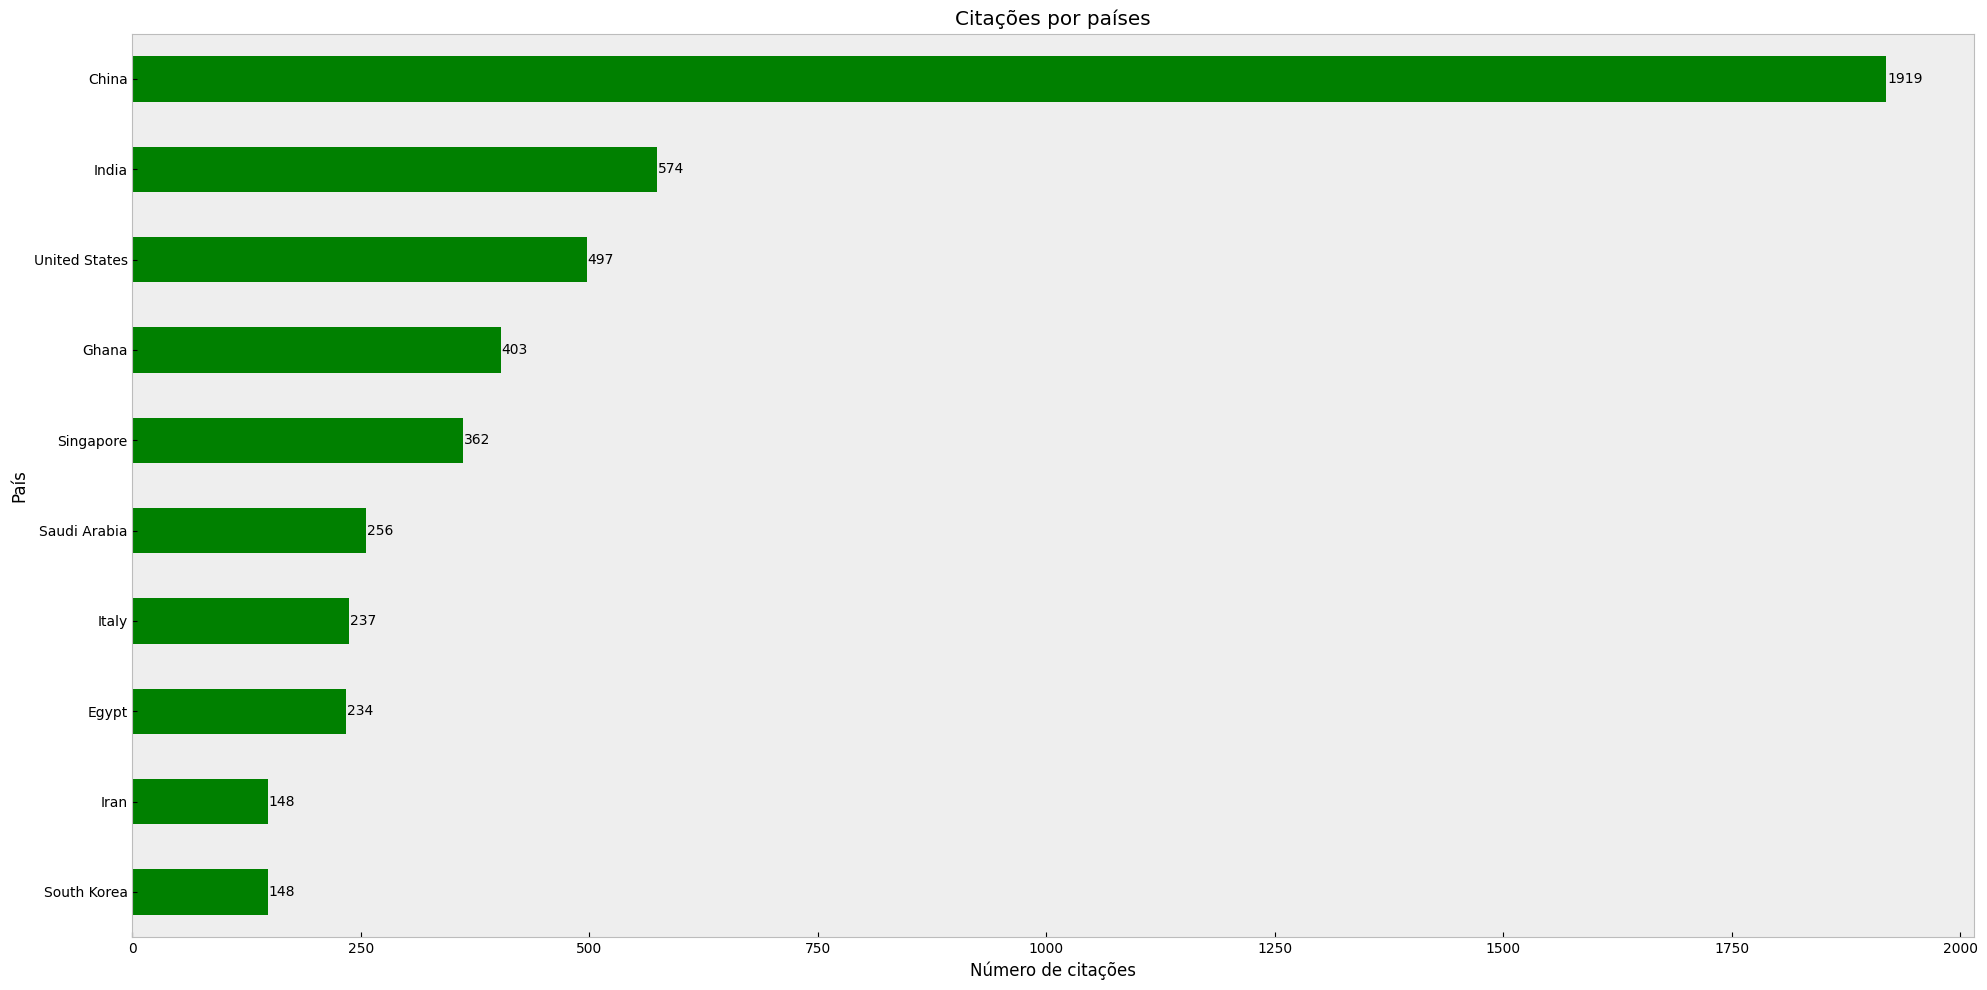

In [ ]:
citations_by_country = df.groupby('country')['cited_by_count'].sum().sort_values(ascending=False)

top10_citations = citations_by_country.head(10).sort_values(ascending=True)
top10_citations.plot(kind='barh', color='green', figsize=(20,10))
plt.title("Citações por países")
plt.ylabel("País")
plt.xlabel("Número de citações")

for index, values in enumerate(top10_citations):
    plt.text(values + 1, index, str(values), va='center')

plt.grid(False)
plt.tight_layout()

plt.show()


### VOSviewer dos termos

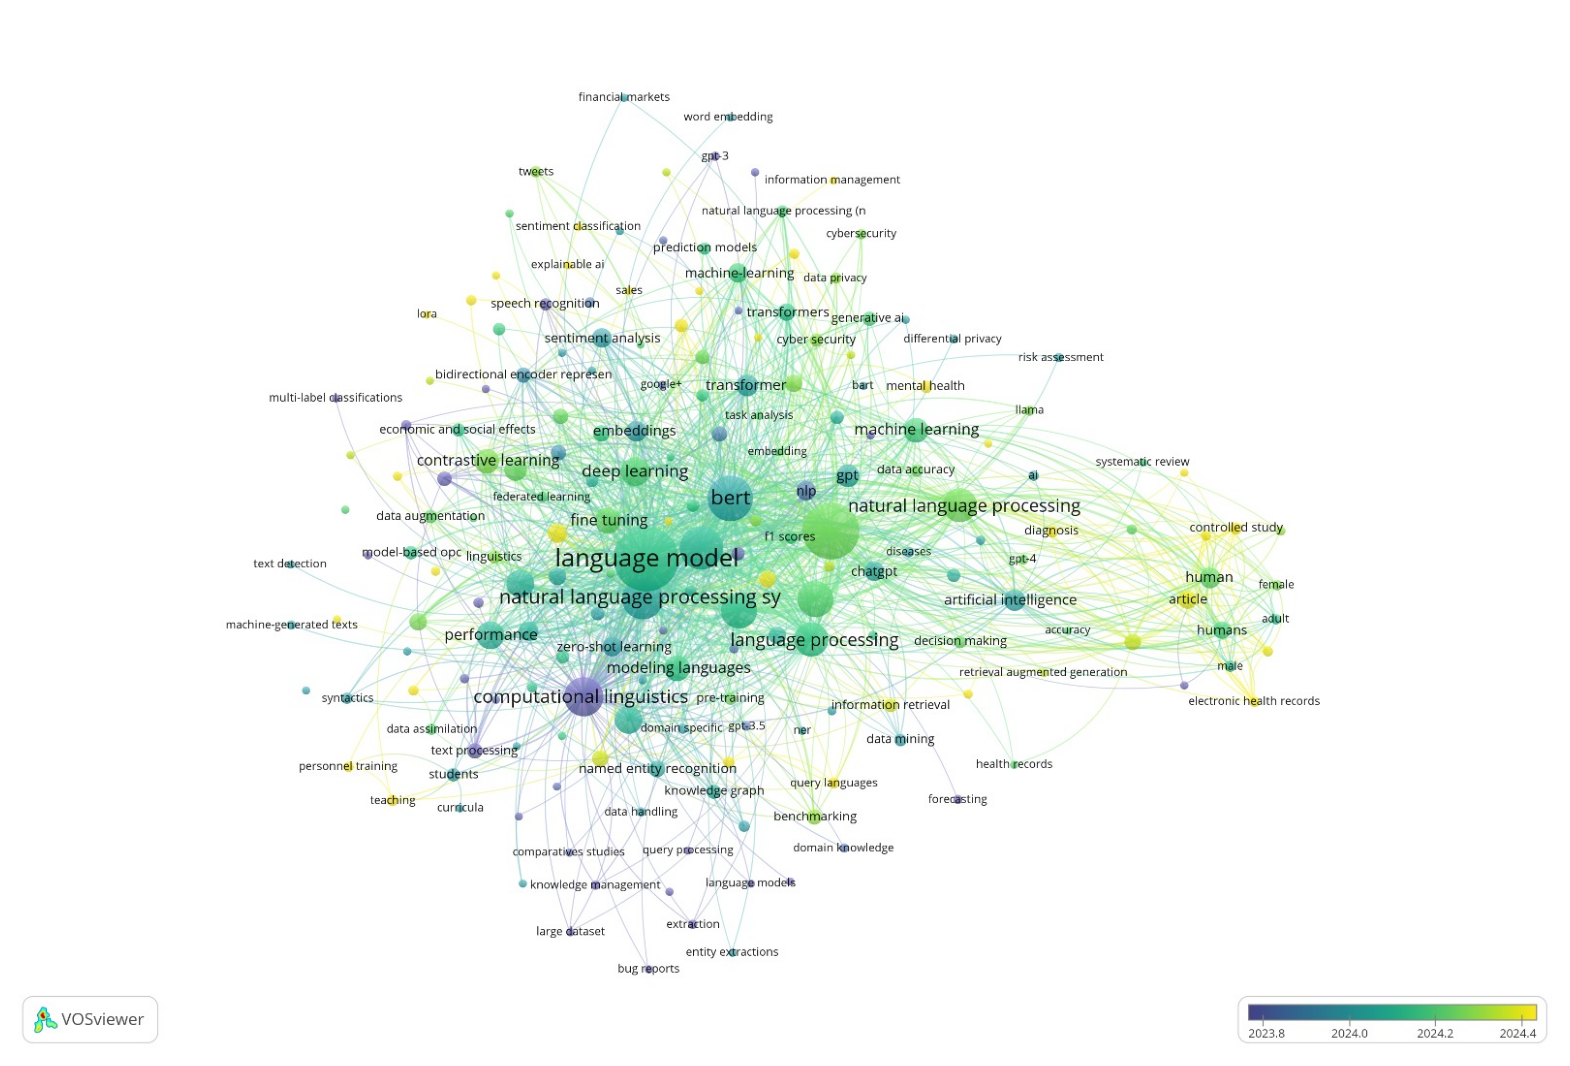

In [29]:
import matplotlib.image as mpimg

img = mpimg.imread("./data/vos.jpeg")

plt.figure(figsize=(20, 16))

plt.imshow(img)

plt.axis('off')
plt.show()

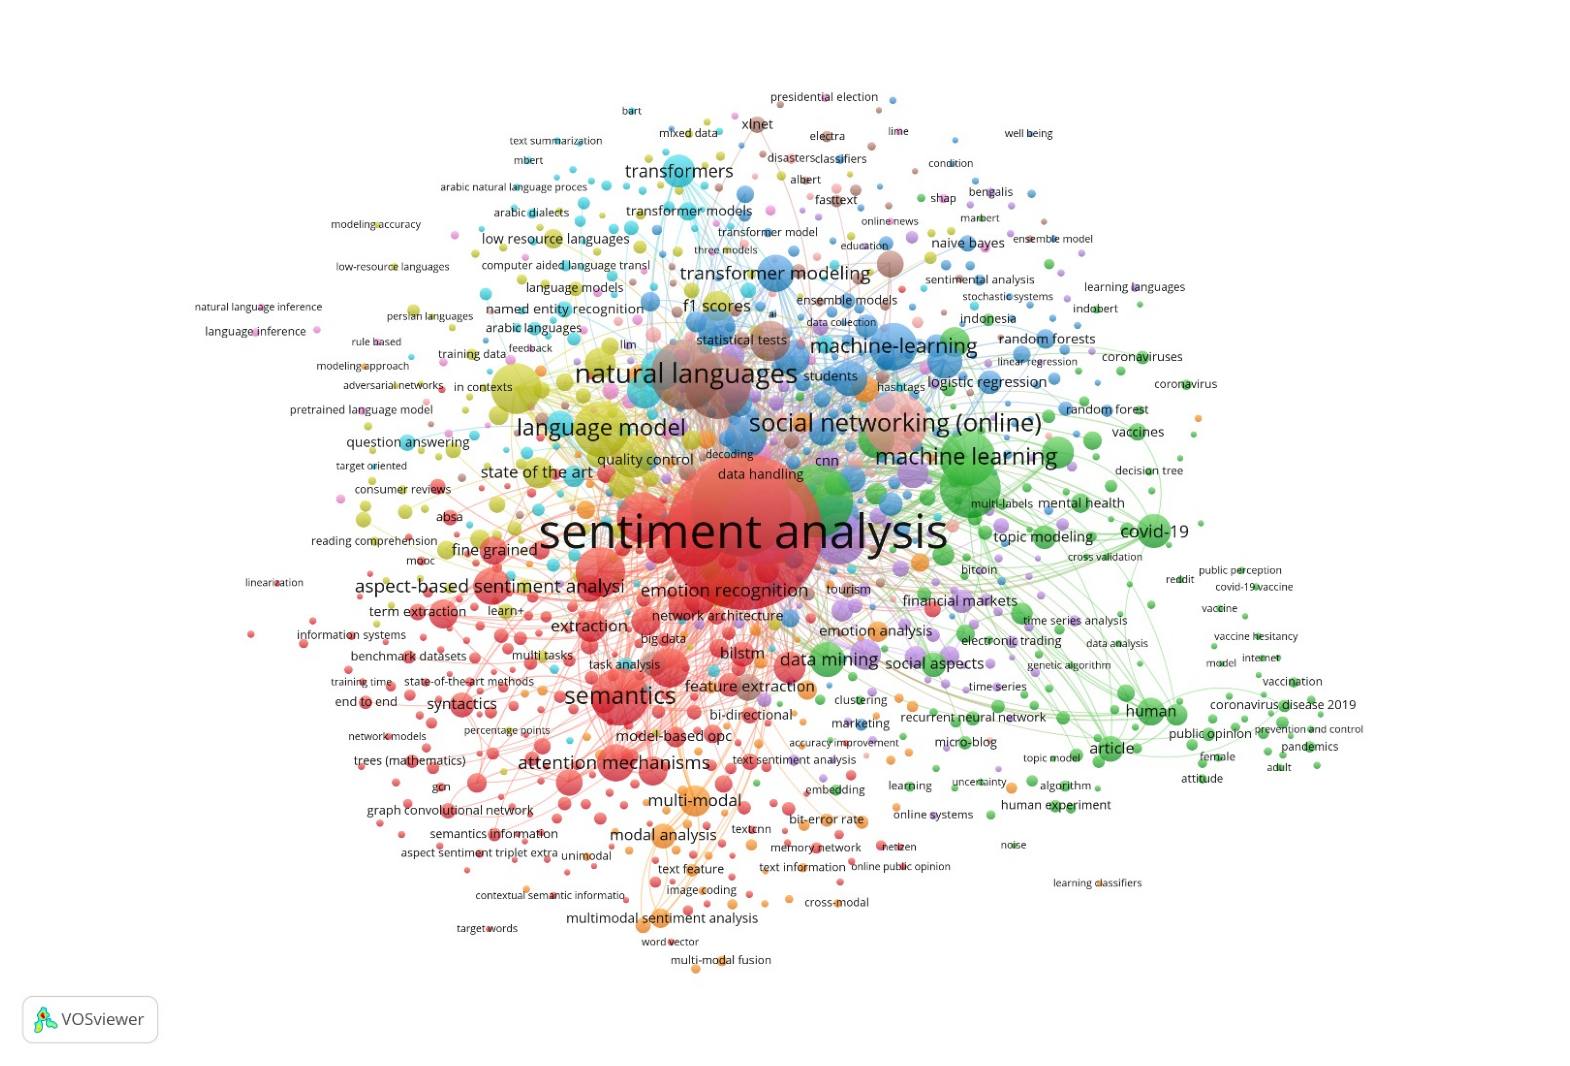

In [30]:
img2 = mpimg.imread("./data/vos2.jpeg")

plt.figure(figsize=(20, 16))

plt.imshow(img2)

plt.axis('off')
plt.show()